In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import itertools
from PIL import Image as IMG

In [2]:
prfas = glob.glob('pooled_log/*_prfa.txt')

In [19]:
scores = [['Experiment','Score','Value']]
for p in prfas:
    if 'global' in p:
        continue
    prfa = open(p).readline()
    p,r,f1,a = [float(a) for a in prfa[1:-1].split(',')]
    scores.append(['Pooled', 'Precision', p])
    scores.append(['Pooled', 'Recall', r])
    scores.append(['Pooled', 'F1', f1])
    scores.append(['Pooled', 'Accuracy', a])

In [20]:
for s in range(6, 10):
    prfa = open(f'test/output/remote/simulatorRun/vbm/{s}/test_log.csv').readlines()[1]
    prfa = prfa.strip().split(',')
    _, p,r,f1,a = [float(a) for a in prfa]
    scores.append(['Distributed', 'Precision', p])
    scores.append(['Distributed', 'Recall', r])
    scores.append(['Distributed', 'F1', f1])
    scores.append(['Distributed', 'Accuracy', a])

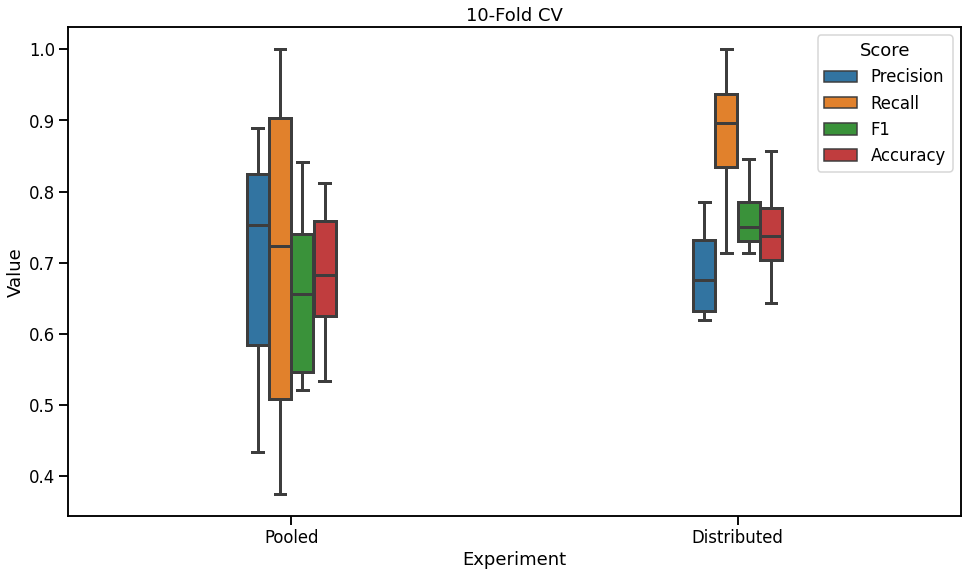

In [21]:
df = pd.DataFrame(scores[1:], columns=scores[0])
plt.rcParams['figure.figsize'] = 16, 9
sns.set_context("talk")
plt.title('10-Fold CV')
ax = sns.boxplot(x='Experiment', y='Value', hue='Score', 
                 data=df, linewidth=3, dodge=True, width=0.2)

- Batch size: 16
- Epochs: 50

In [24]:
# IMG.open('/home/ak/Pictures/heap out of memory.png')

In [4]:
choices = []
axises = [0, 1, 2]
for i in range(len(axises)):
    choices += list(itertools.combinations(axises, i + 1))

In [13]:
choices

[(0,), (1,), (2,), (0, 1), (0, 2), (1, 2), (0, 1, 2)]

In [6]:
import nibabel as ni

In [11]:
obj = ni.load('test/input/local0/simulatorRun/nifti_file_S00/M02101222_swc1t1avg.nii')
arr = np.array(obj.dataobj)
print(arr.shape)

(121, 145, 121)


In [12]:
for c in choices:
    a = arr.copy()
    a = np.flip(a, c)
    print(a.shape)

(121, 145, 121)
(121, 145, 121)
(121, 145, 121)
(121, 145, 121)
(121, 145, 121)
(121, 145, 121)
(121, 145, 121)
